In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sem

In [2]:
# Read the csvs into dataframes
df_wastewater_county = pd.read_csv('resources/wastewater_by_county.csv', parse_dates = True)
df_cases_county = pd.read_csv('resources/cases_by_county.csv', parse_dates = True)

# Convert dates into datetime format
df_wastewater_county['sampling_week'] = pd.to_datetime(df_wastewater_county['sampling_week'])
df_cases_county['date'] = pd.to_datetime(df_cases_county['date'])

# Display the dataframes
display(df_wastewater_county.head())
display(df_cases_county.head())


,sampling_week,effective_concentration_rolling_average,region,state,name,fipscode
0,2020-03-04,1.740219,Northeast,MA,"Suffolk County, MA",25025
1,2020-03-11,12.590344,Northeast,MA,"Suffolk County, MA",25025
2,2020-03-18,58.023322,Northeast,MA,"Suffolk County, MA",25025
3,2020-03-25,36.631750,West,CO,"Arapahoe County, CO",8005
4,2020-03-25,4051.550869,Northeast,NJ,"Essex County, NJ",34013


,date,rolling_average_cases_per_100k,region,state,name,fipscode
0,2020-11-09,40.954431,Northeast,MA,"Hampden County, MA",25013
1,2020-11-10,44.568958,Northeast,MA,"Hampden County, MA",25013
2,2020-11-12,47.999696,Northeast,MA,"Hampden County, MA",25013
3,2020-11-19,45.365380,Northeast,MA,"Hampden County, MA",25013
4,2020-11-21,47.570854,Northeast,MA,"Hampden County, MA",25013


In [3]:
# Get basic info about the dataframes
display(df_wastewater_county.info())
display(df_wastewater_county.shape)
display(df_cases_county.info())
display(df_cases_county.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15950 entries, 0 to 15949
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   sampling_week                            15950 non-null  datetime64[ns]
 1   effective_concentration_rolling_average  15950 non-null  float64       
 2   region                                   15950 non-null  object        
 3   state                                    15950 non-null  object        
 4   name                                     15950 non-null  object        
 5   fipscode                                 15950 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 747.8+ KB


None

(15950, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294925 entries, 0 to 294924
Data columns (total 6 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   date                            294925 non-null  datetime64[ns]
 1   rolling_average_cases_per_100k  294925 non-null  float64       
 2   region                          294925 non-null  object        
 3   state                           294925 non-null  object        
 4   name                            294925 non-null  object        
 5   fipscode                        294925 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 13.5+ MB


None

(294925, 6)

In [17]:

# Rename the columns in the dataframes to make the graphs look better
df_wastewater_county = df_wastewater_county.rename(columns = {'effective_concentration_rolling_average': 
                                                              'Antigens in Wastewater',
                                                              'name' :
                                                              'County Name',
                                                              'sampling_week':
                                                              'Date',
                                                              'state':
                                                              'State',
                                                              'region':
                                                              'Region',
                                                              'fipscode':
                                                              'Fipscode'})

df_cases_county = df_cases_county.rename(columns = {'rolling_average_cases_per_100k':
                                                    'Rolling Average Cases per 100K',
                                                    'name':
                                                    'County Name',
                                                    'date':
                                                    'Date',
                                                    'state':
                                                    'State',
                                                    'region':
                                                    'Region',
                                                    'fipscode':
                                                    'Fipscode'})

# Display the new column names
display(df_wastewater_county.head())
display(df_cases_county.head())



,Date,Antigens in Wastewater,Region,State,County Name,Fipscode
0,2020-03-04,1.740219,Northeast,MA,"Suffolk County, MA",25025
1,2020-03-11,12.590344,Northeast,MA,"Suffolk County, MA",25025
2,2020-03-18,58.023322,Northeast,MA,"Suffolk County, MA",25025
3,2020-03-25,36.631750,West,CO,"Arapahoe County, CO",8005
4,2020-03-25,4051.550869,Northeast,NJ,"Essex County, NJ",34013


,Date,Rolling Average Cases per 100K,Region,State,County Name,Fipscode
0,2020-11-09,40.954431,Northeast,MA,"Hampden County, MA",25013
1,2020-11-10,44.568958,Northeast,MA,"Hampden County, MA",25013
2,2020-11-12,47.999696,Northeast,MA,"Hampden County, MA",25013
3,2020-11-19,45.365380,Northeast,MA,"Hampden County, MA",25013
4,2020-11-21,47.570854,Northeast,MA,"Hampden County, MA",25013


In [18]:
# Combine the two dataframes and set the index to the date.
df_county = pd.concat([df_wastewater_county, df_cases_county], axis='rows', ignore_index=True)

df_county = df_county.set_index('Date')

# Left in if we want to slice by a specific time frame.
#df_county = df_county.sort_index().loc['2020-03-11' : '2021-03-11', :]

# Display the new dataframe
display(df_county.head())



,Antigens in Wastewater,Region,State,County Name,Fipscode,Rolling Average Cases per 100K
Date,,,,,,
2020-03-04,1.740219,Northeast,MA,"Suffolk County, MA",25025,NaN
2020-03-11,12.590344,Northeast,MA,"Suffolk County, MA",25025,NaN
2020-03-18,58.023322,Northeast,MA,"Suffolk County, MA",25025,NaN
2020-03-25,36.631750,West,CO,"Arapahoe County, CO",8005,NaN
2020-03-25,4051.550869,Northeast,NJ,"Essex County, NJ",34013,NaN


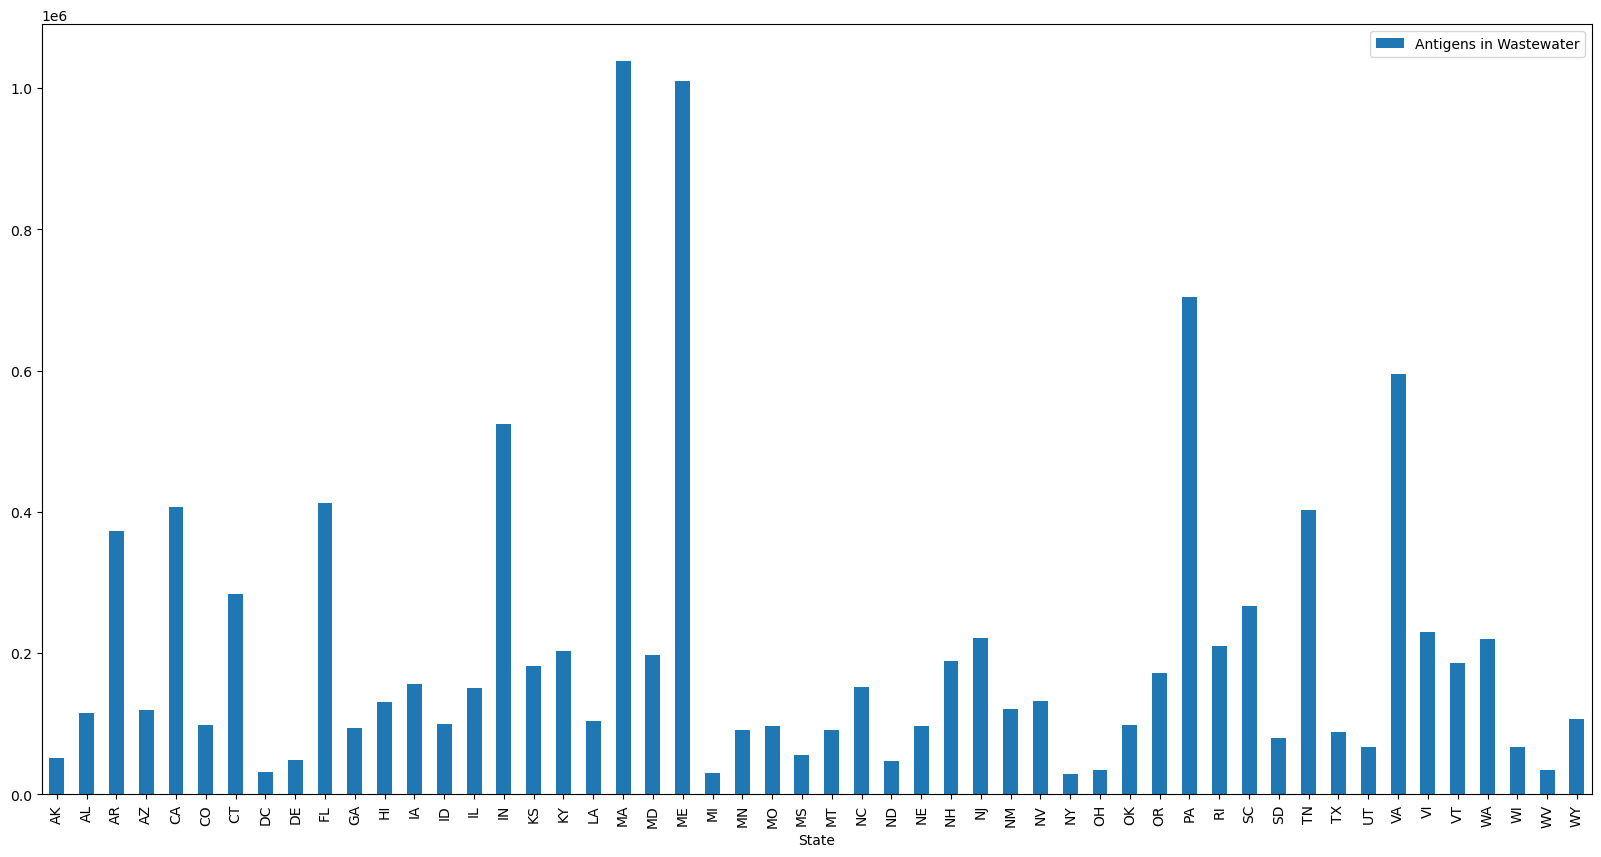

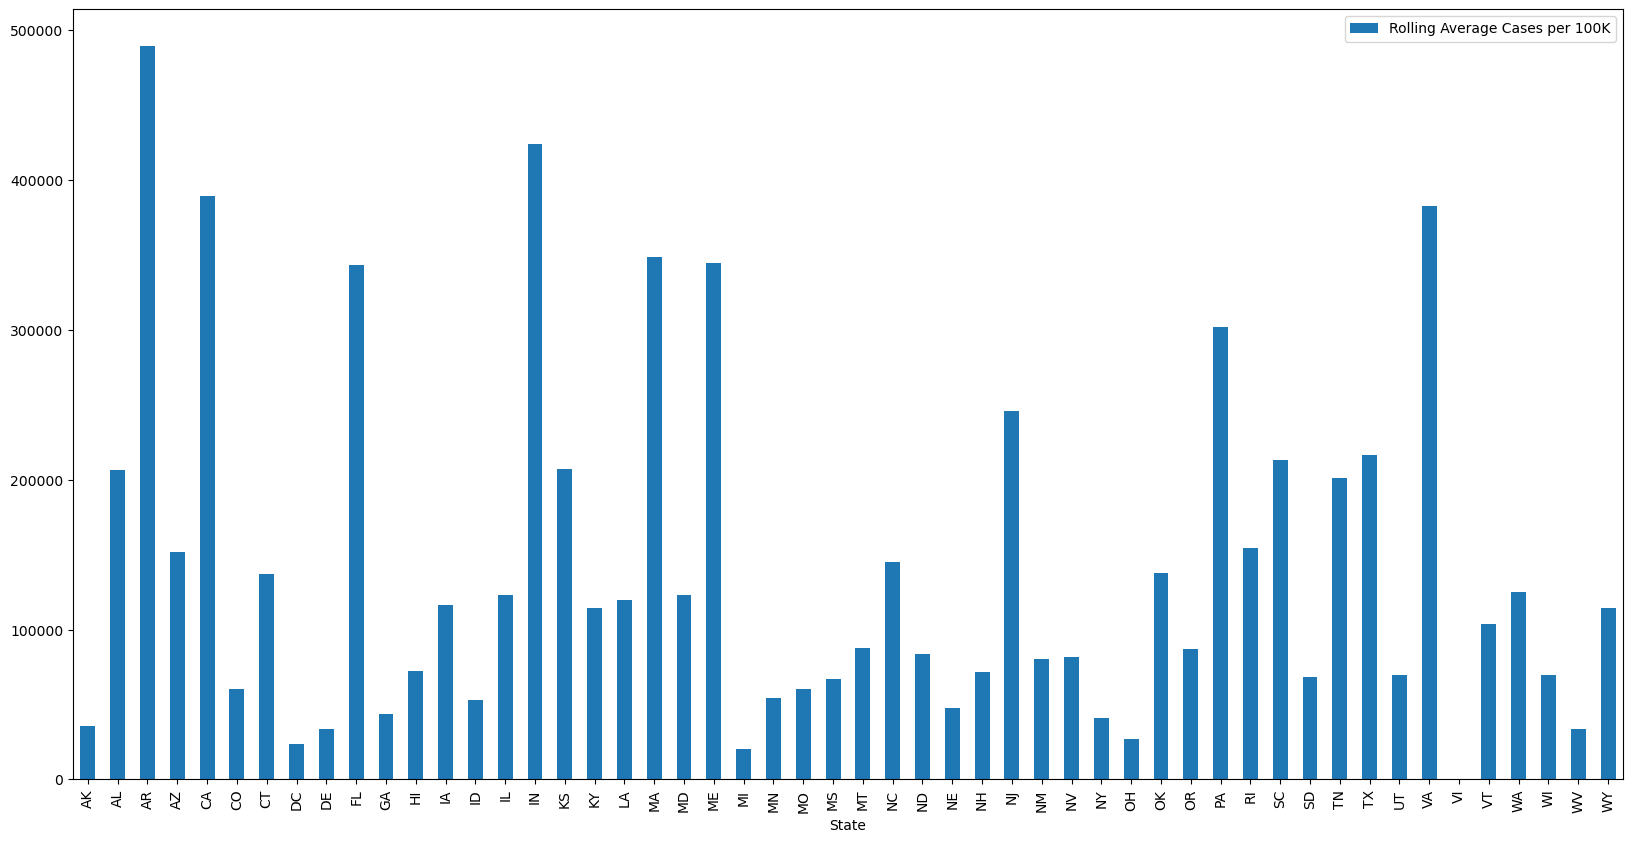

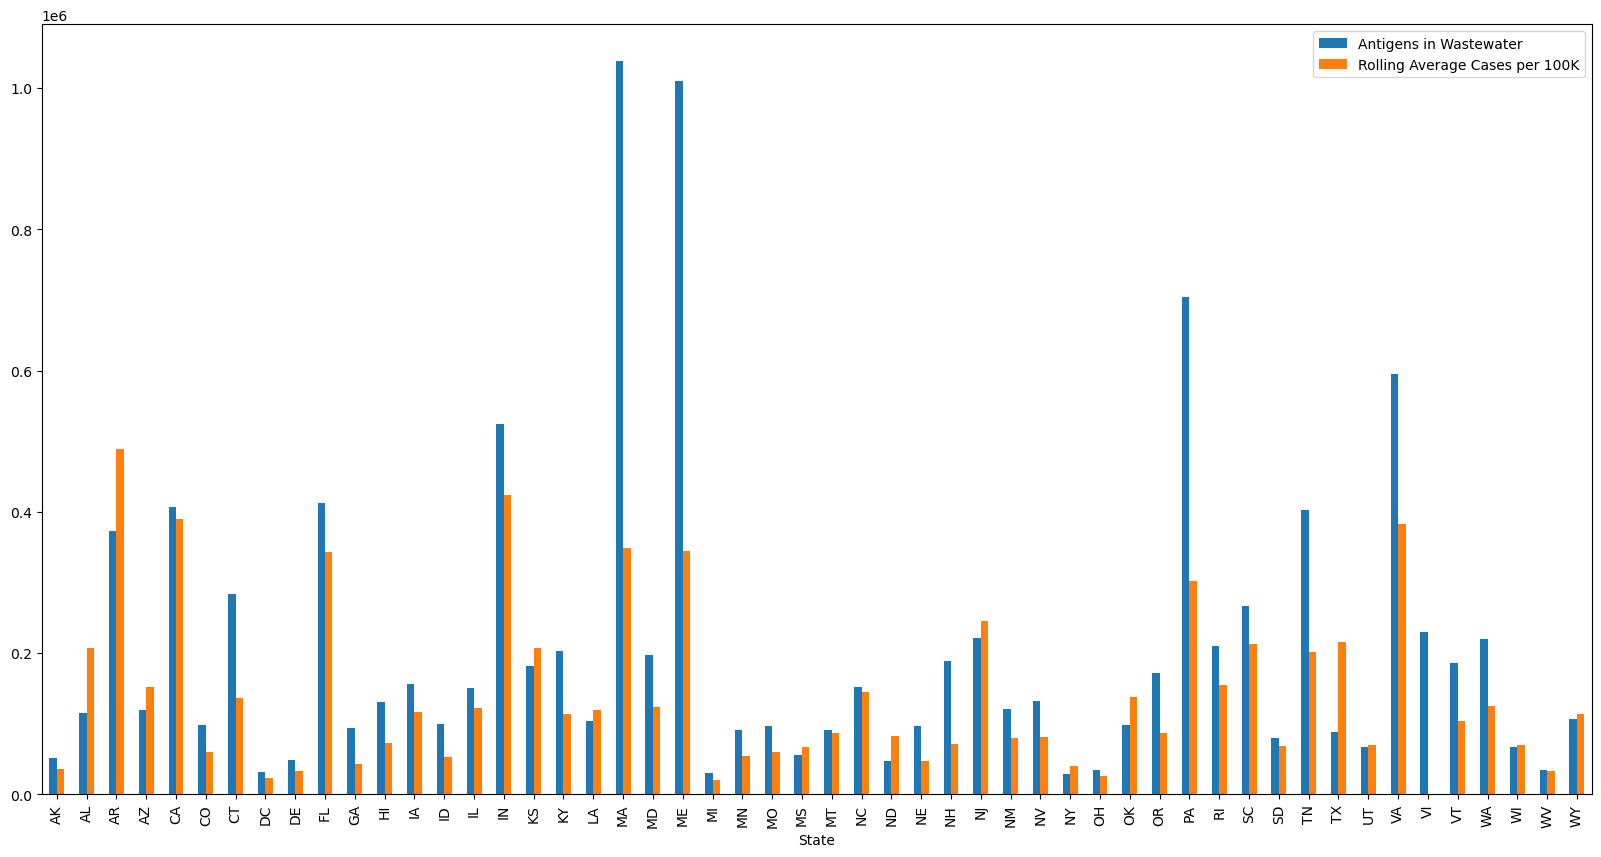

In [6]:
# Create a pivot table to compare the Antigens in Wastewater to the Rolling average of cases of covid by location.
df_pivot = df_county.pivot_table(values= ['Antigens in Wastewater', 'Rolling Average Cases per 100K'],
                                 index= ['State'],
                                aggfunc= 'sum')

# Plot the pivot table
df_pivot.plot(kind= 'bar', y = 'Antigens in Wastewater', figsize=(20, 10))

df_pivot.plot(kind= 'bar', y = 'Rolling Average Cases per 100K', figsize=(20, 10))

df_pivot.plot(kind = 'bar', y = ['Antigens in Wastewater', 'Rolling Average Cases per 100K'], figsize=(20, 10))

plt.show()

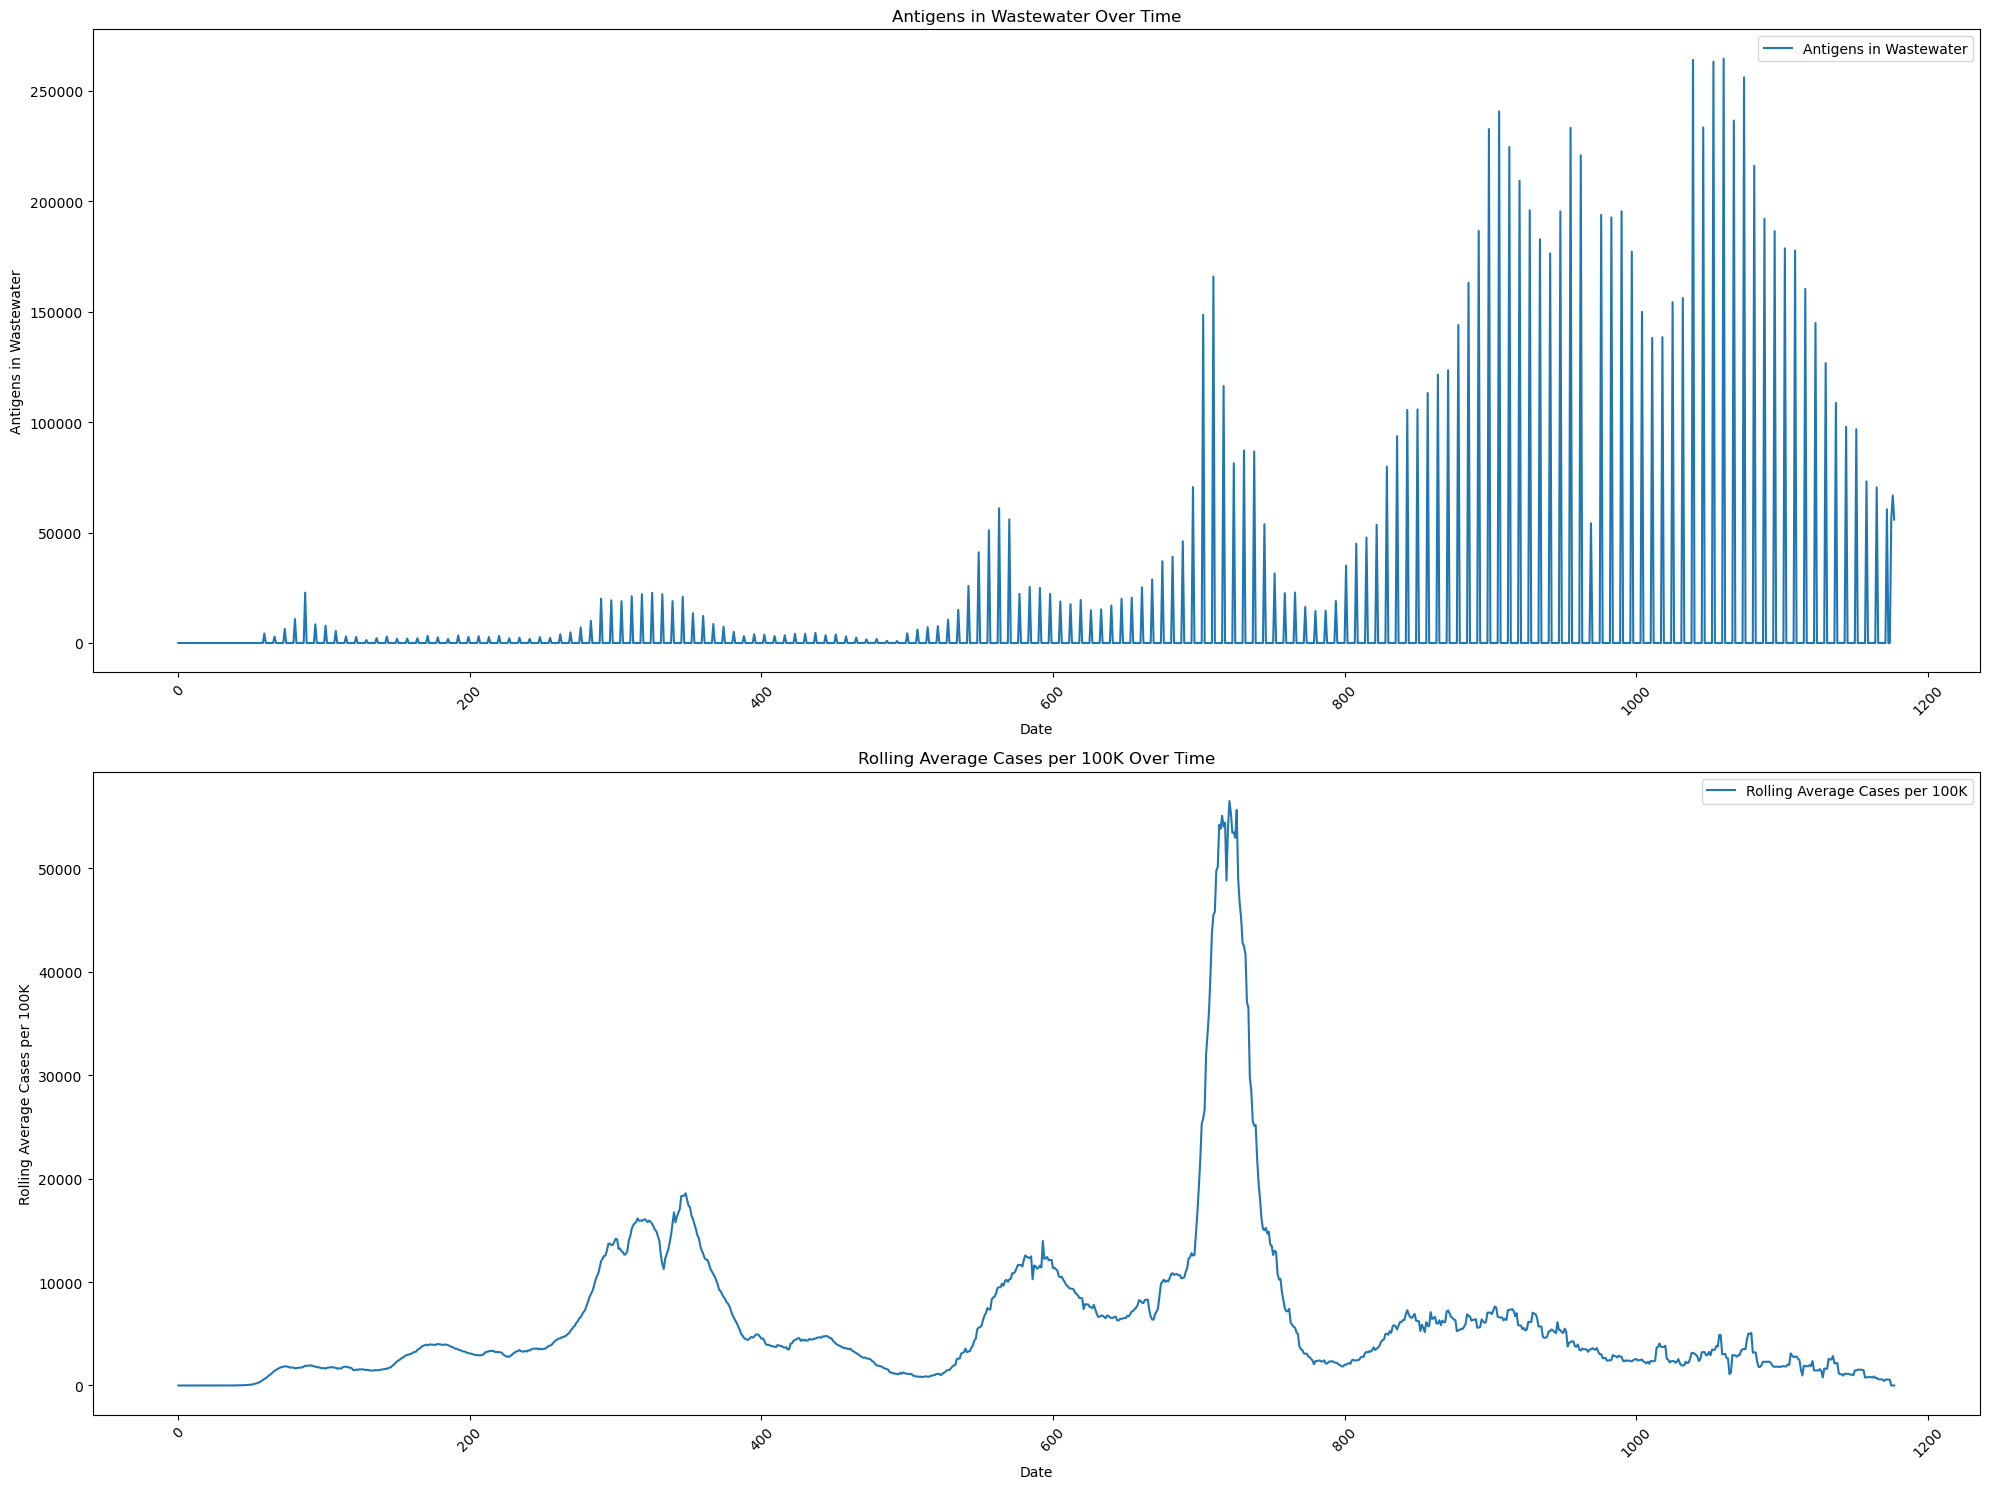

In [85]:
# Create a pivot table
df_pivot_date = df_county.pivot_table(values=['Antigens in Wastewater', 'Rolling Average Cases per 100K'],
                                       index=['Date'],
                                       aggfunc='sum')


# Plot the pivot table
# Create subplots


df_pivot_date.reset_index(inplace=True)


fig, ax = plt.subplots(2, 1, figsize=(20, 15))

# bar plot for Antigens in Wastewater
df_pivot_date.plot(kind='line', y='Antigens in Wastewater', ax=ax[0], title='Antigens in Wastewater Over Time')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Antigens in Wastewater')
ax[0].tick_params(axis='x', rotation=45)

# bar plot for Rolling Average Cases per 100K
df_pivot_date.plot(kind='line', y='Rolling Average Cases per 100K', ax=ax[1], title='Rolling Average Cases per 100K Over Time')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Rolling Average Cases per 100K')
ax[1].tick_params(axis='x', rotation=45)


# Show the plots
plt.tight_layout()
plt.show()



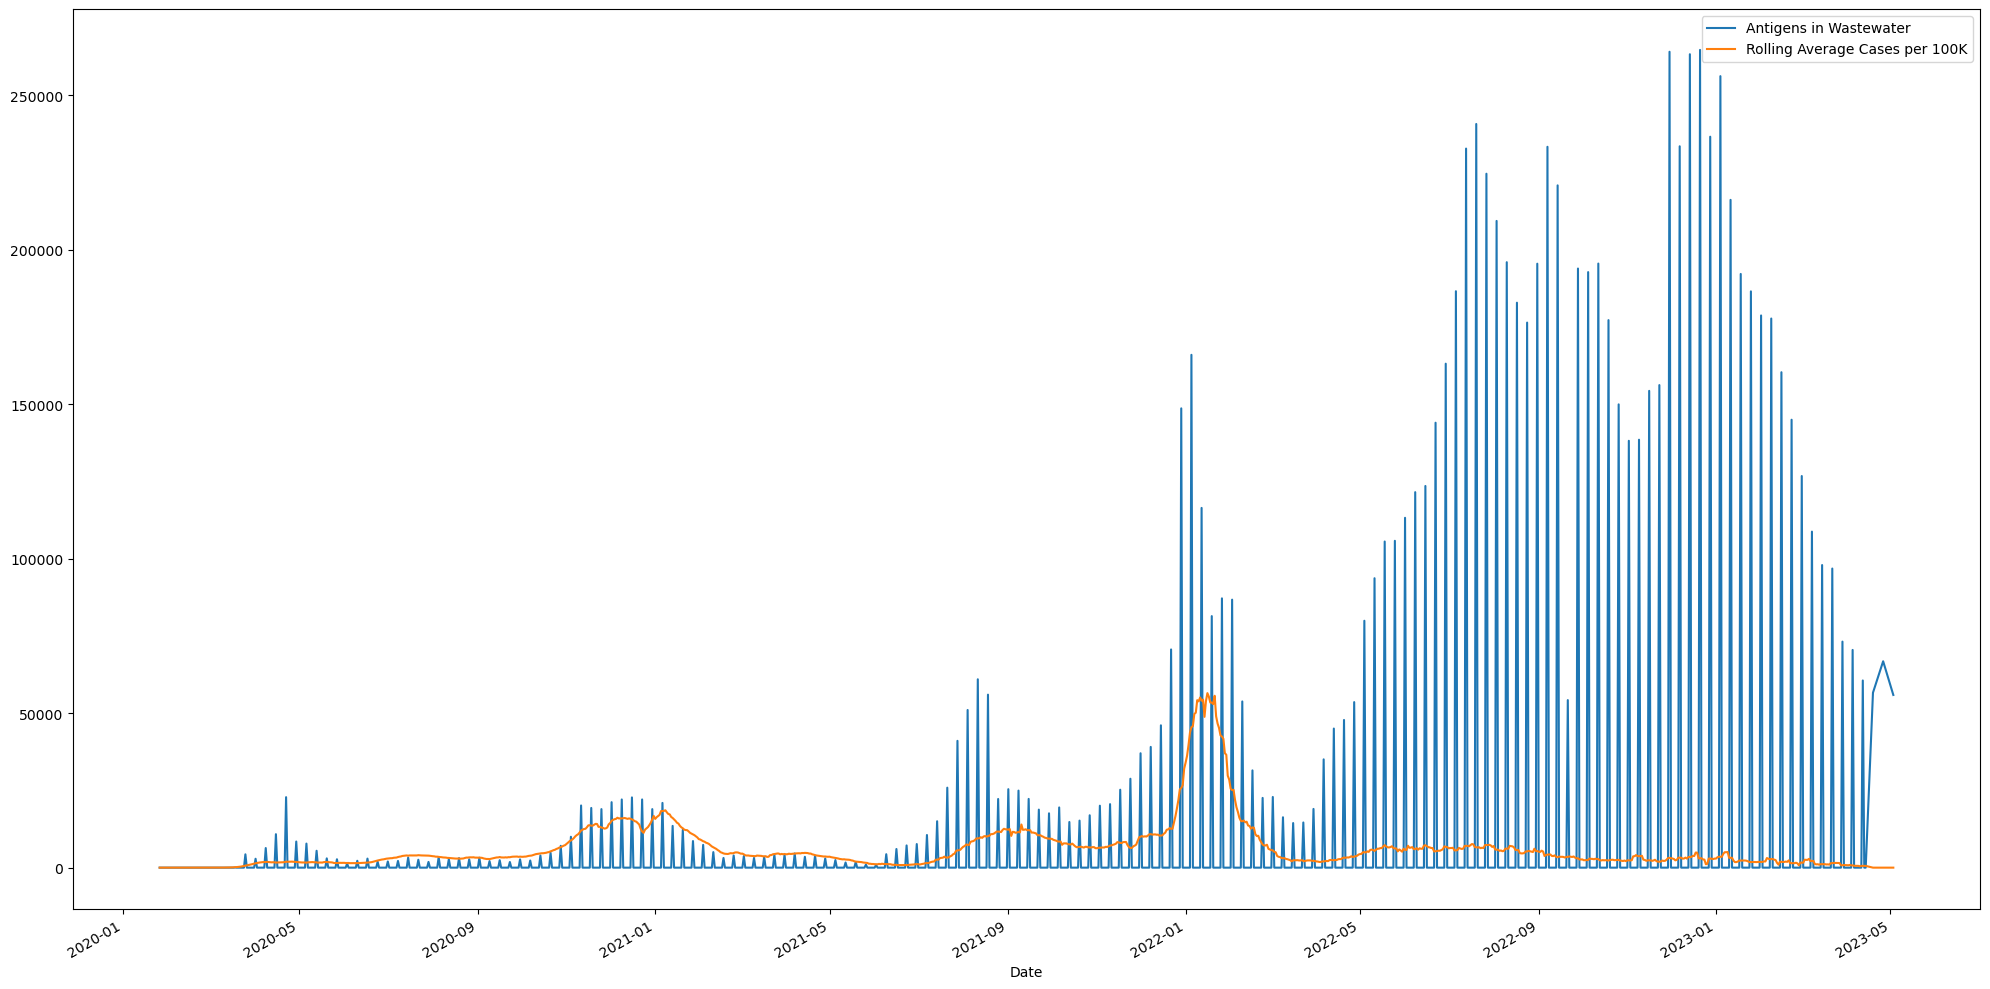

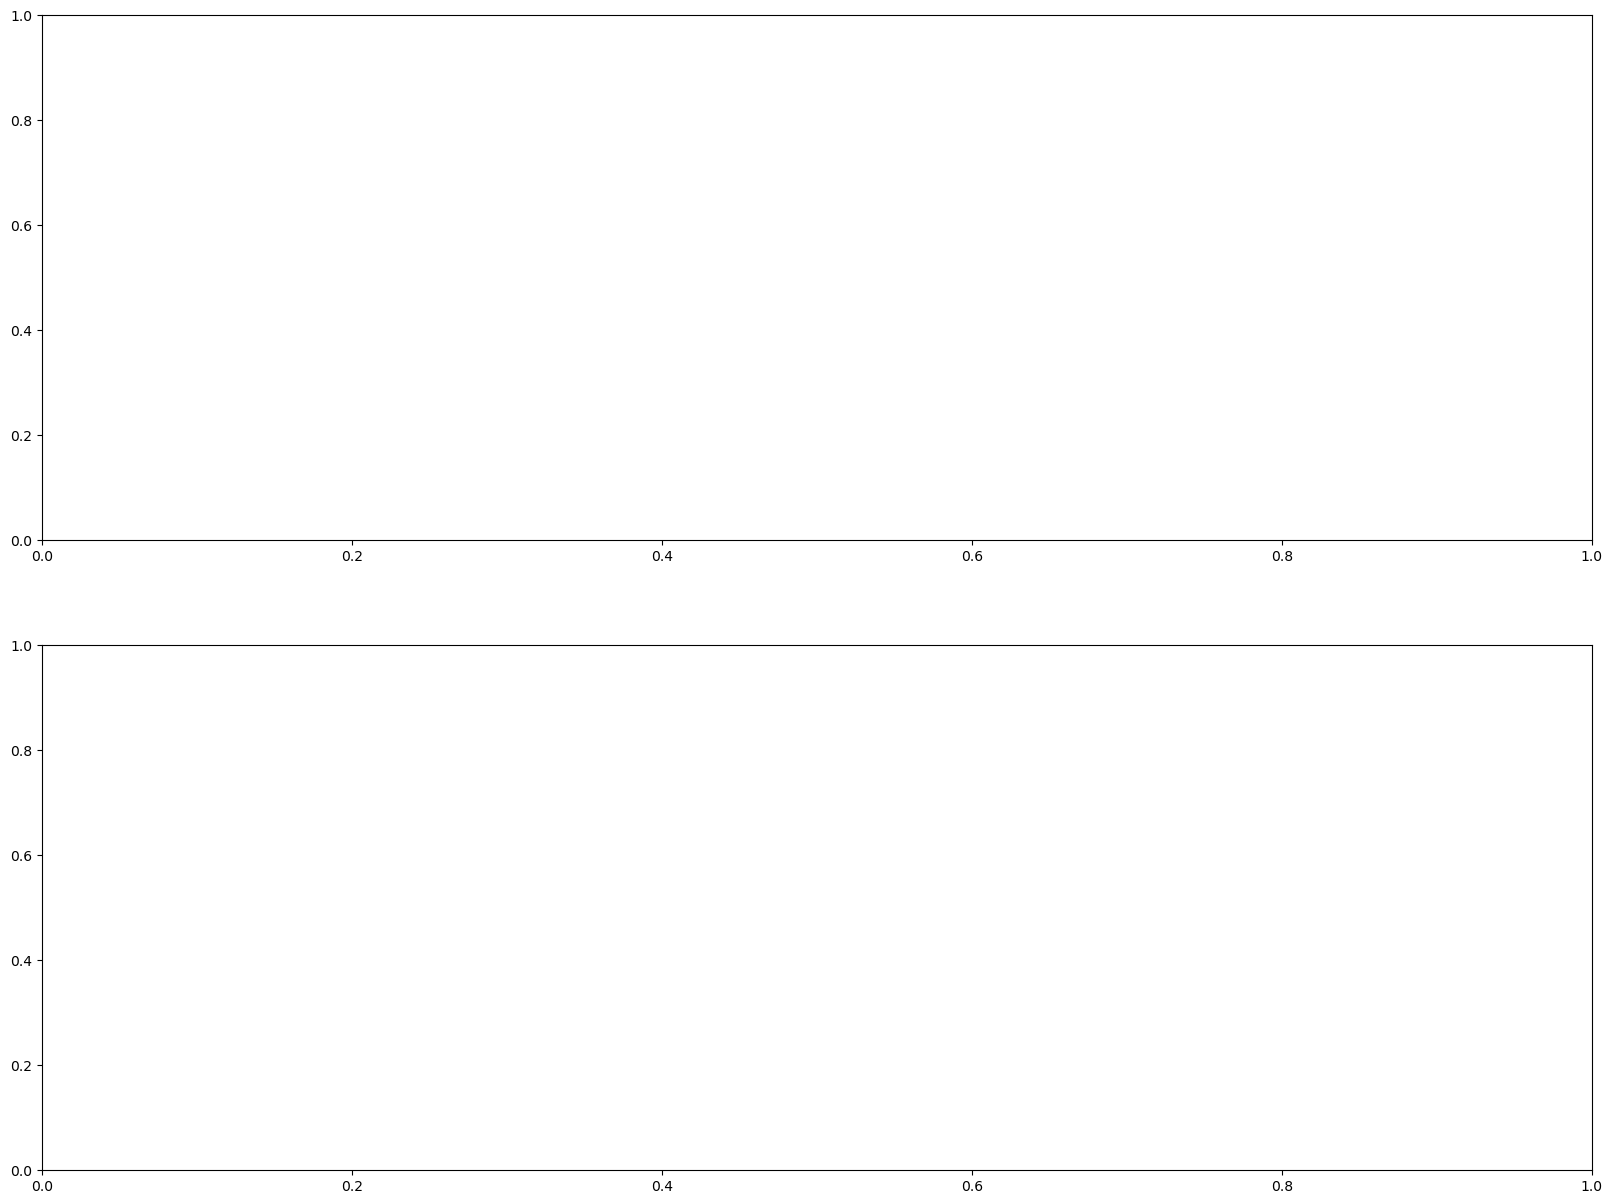

In [84]:
# Create a pivot table
df_pivot_date = df_county.pivot_table(values=['Antigens in Wastewater', 'Rolling Average Cases per 100K'],
                                       index=['Date'],
                                       aggfunc='sum')

df_pivot_date.reset_index(inplace=True)
df_pivot_date.plot(kind = 'line', x = 'Date', y = ['Antigens in Wastewater', 'Rolling Average Cases per 100K'], figsize=(20, 10))

#plt.title('Antigens in Wastewater and Rolling Average Cases per 100K Over Time')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(2, 1, figsize=(20, 15))


